In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# To display plots inline
%matplotlib inline

In [2]:
# Load your temperature and humidity datasets
# Replace 'temperature_dataset.csv' and 'humidity_dataset.csv' with the paths to your datasets
df_temp = pd.read_csv('../Dataset/ProcessedDataset/colombo_t_2012-2018.csv')
df_humidity = pd.read_csv('../Dataset/ProcessedDataset/colombo_rh_2012-2018.csv')

# Display the first few rows of each dataset
print("Temperature Data:")
print(df_temp.head())
print("\nHumidity Data:")
print(df_humidity.head())

Temperature Data:
   station_id station_name element_name  year  month  day  obs_val_x  \
0       43466      COLOMBO       TMPMAX  2012      1    1       30.1   
1       43466      COLOMBO       TMPMAX  2012      1    2       30.7   
2       43466      COLOMBO       TMPMAX  2012      1    3       31.6   
3       43466      COLOMBO       TMPMAX  2012      1    4       30.4   
4       43466      COLOMBO       TMPMAX  2012      1    5       32.3   

         date  
0  2012-01-01  
1  2012-01-02  
2  2012-01-03  
3  2012-01-04  
4  2012-01-05  

Humidity Data:
   station_id station_name element_name  year  month  day  obs_val_y  \
0       43466      COLOMBO        RHMAX  2012      1    1       91.0   
1       43466      COLOMBO        RHMAX  2012      1    2       90.0   
2       43466      COLOMBO        RHMAX  2012      1    3       89.0   
3       43466      COLOMBO        RHMAX  2012      1    4       89.0   
4       43466      COLOMBO        RHMAX  2012      1    5       95.0   

    

In [3]:
# Convert 'Date' columns to datetime
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_humidity['date'] = pd.to_datetime(df_humidity['date'])

# Merge the datasets on 'Date'
df = pd.merge(df_temp, df_humidity, on='date', how='inner')

# Display the first few rows of the merged dataset
df.head()

,station_id_x,station_name_x,element_name_x,year_x,month_x,day_x,obs_val_x,date,station_id_y,station_name_y,element_name_y,year_y,month_y,day_y,obs_val_y
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1,2012-01-01,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7,2012-01-02,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6,2012-01-03,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4,2012-01-04,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3,2012-01-05,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [4]:
df['obs_val_x'] = df['obs_val_x'] * 9/5 + 32

def calculate_heat_index(temp_f, humidity):
    # Simple heat index formula
    # This is a simplified formula; a more accurate calculation would require a more complex equation
    return -42.379 + 2.04901523*temp_f + 10.14333127*humidity - 0.22475541*temp_f*humidity - 0.00683783*temp_f**2 - 0.05481717*humidity**2 + 0.00122874*temp_f**2*humidity + 0.00085282*temp_f*humidity**2 - 0.00000199*temp_f**2*humidity**2

# Calculate heat index
df['Heat_Index'] = df.apply(lambda row: calculate_heat_index(row['obs_val_x'], row['obs_val_y']), axis=1)

In [5]:
df.head()

,station_id_x,station_name_x,element_name_x,year_x,month_x,day_x,obs_val_x,date,station_id_y,station_name_y,element_name_y,year_y,month_y,day_y,obs_val_y,Heat_Index
0,43466,COLOMBO,TMPMAX,2012,1,1,86.18,2012-01-01,43466,COLOMBO,RHMAX,2012,1,1,91.0,106.586916
1,43466,COLOMBO,TMPMAX,2012,1,2,87.26,2012-01-02,43466,COLOMBO,RHMAX,2012,1,2,90.0,110.222986
2,43466,COLOMBO,TMPMAX,2012,1,3,88.88,2012-01-03,43466,COLOMBO,RHMAX,2012,1,3,89.0,116.153191
3,43466,COLOMBO,TMPMAX,2012,1,4,86.72,2012-01-04,43466,COLOMBO,RHMAX,2012,1,4,89.0,107.436420
4,43466,COLOMBO,TMPMAX,2012,1,5,90.14,2012-01-05,43466,COLOMBO,RHMAX,2012,1,5,95.0,127.316863


In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Drop unnecessary columns
df.drop(['station_id_x','station_name_x','station_name_y','station_id_y','year_x','month_x','day_x', 'year_y','month_y','day_y','element_name_x','element_name_y'], axis=1, inplace=True)

# Set the date column as the index
df.set_index('date', inplace=True)

In [7]:
df.head()

,obs_val_x,obs_val_y,Heat_Index
date,,,
2012-01-01,86.18,91.0,106.586916
2012-01-02,87.26,90.0,110.222986
2012-01-03,88.88,89.0,116.153191
2012-01-04,86.72,89.0,107.436420
2012-01-05,90.14,95.0,127.316863


In [8]:
df.isnull().sum()

obs_val_x     46
obs_val_y     40
Heat_Index    66
dtype: int64

In [9]:
import pandas as pd

# Assuming df is your DataFrame
# Replace missing/null values in each column with the mean of that column
df['obs_val_x'].fillna(df['obs_val_x'].mean(), inplace=True)
df['obs_val_y'].fillna(df['obs_val_y'].mean(), inplace=True)
df['Heat_Index'].fillna(df['Heat_Index'].mean(), inplace=True)

In [10]:
# Verify if there are any missing/null values left
print(df.isnull().sum())

obs_val_x     0
obs_val_y     0
Heat_Index    0
dtype: int64


In [11]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['Heat_Index'])

1. ADF :  -3.750158522459752
2. P-Value :  0.0034604646469976437
3. Num Of Lags :  34
4. Num Of Observations Used For ADF Regression: 6235
5. Critical Values :
	 1% :  -3.4313992372517417
	 5% :  -2.862003669623052
	 10% :  -2.5670168084236167


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

from pmdarima.arima import auto_arima

# Fit auto ARIMA model
auto_model = auto_arima(df['Heat_Index'], start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal=False,
                        d=None, trace=True, error_action='ignore', suppress_warnings=True)



# Predictions
predictions = auto_model.predict(n_periods=12)

# Summary of the auto ARIMA model
print(auto_model.summary())

c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50386.694, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54280.090, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54228.989, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50397.769, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54278.090, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44044.696, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=47459.515, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39710.747, Time=3.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=40264.047, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=39553.747, Time=6.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=42699.761, Time=2.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=39060.386, Time=5.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=39839.227, Time=4.92 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=39058.396, Time=2.56 sec
 ARIMA(2,1,3)(0,0,0

c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [13]:
# Fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
best_model = ARIMA(df['Heat_Index'], order=(3, 1, 3))
best_model_fit = best_model.fit()

# Print model summary
# print(best_model_fit.summary())

# Forecast
forecast_steps = 10  # Number of steps ahead to forecast
forecast = best_model_fit.forecast(steps=forecast_steps)

# Print forecast
print("Forecasted values:", forecast)

c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted values: 6270    109.648570
6271     95.945447
6272    106.068481
6273     99.983538
6274    109.595386
6275     96.006990
6276    106.007417
6277    100.035913
6278    109.542852
6279     96.067882
Name: predicted_mean, dtype: float64


c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Predictions
start_index = len(df) - forecast_steps
end_index = len(df) - 1
predictions = best_model_fit.predict(start=start_index, end=end_index, typ='levels')

# Actual values for the forecast period
actual_values = df['Heat_Index'][start_index:end_index+1]

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_values, predictions))
print("Root Mean Squared Error (RMSE) for the forecast period:", rmse)

Root Mean Squared Error (RMSE) for the forecast period: 6.121143936219458


In [15]:
from datetime import datetime
import pandas as pd

# Get today's date
today = datetime.today()

# Calculate the start date for the forecast (1 year back)
forecastingSteps = 365
forecastStarting = today - pd.DateOffset(days=forecastingSteps)
forecastStarting = forecastStarting.strftime('%Y-%m-%d')

# Generate the date range for the forecast
forecastingIndex = pd.date_range(start=forecastStarting, periods=forecastingSteps, freq='D')

# Generate the forecast values
forecast = best_model_fit.forecast(steps=forecastingSteps)
forecastingPastDataset = pd.DataFrame({
    'date': forecastingIndex.date,
    'values': forecast
})

# Print the forecasted values
print('\nForecasted Heat Index for the past 12 months:')
print(forecastingPastDataset)
forecastingPastDataset.to_csv('../Dataset/ForecastData/predicted_data_past.csv', index=False)

c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\cheha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Forecasted Heat Index for the past 12 months:
            date      values
6270  2023-05-18  109.648570
6271  2023-05-19   95.945447
6272  2023-05-20  106.068481
6273  2023-05-21   99.983538
6274  2023-05-22  109.595386
...          ...         ...
6630  2024-05-12  106.754312
6631  2024-05-13   99.582501
6632  2024-05-14  102.543733
6633  2024-05-15  102.747100
6634  2024-05-16  106.737219

[365 rows x 2 columns]


OSError: Cannot save file into a non-existent directory: '..\Dataset\ForecastData'

In [ ]:
forecastingSteps = 365
# Create a date column

today = datetime.today().strftime('%Y-%m-%d')
forecastingIndex = pd.date_range(start=today, periods=forecastingSteps + 1, freq='D')[1:]
forecast = best_model_fit.forecast(steps=forecastingSteps)
forecastingFutureDataset = pd.DataFrame({
                            'date': forecastingIndex.date,
                            'values': forecast})
print('Forecasted Heat Index for the next 12 months:')
print(forecastingFutureDataset)
forecastingFutureDataset.to_csv('../Dataset/ForecastData/predicted_data_future.csv', index=False)

Forecasted Heat Index for the next 12 months:
            date      values
6270  2024-05-17  110.092253
6271  2024-05-18  100.368037
6272  2024-05-19  110.207929
6273  2024-05-20  100.471855
6274  2024-05-21  110.230400
...          ...         ...
6630  2025-05-12  107.166792
6631  2025-05-13  103.728537
6632  2025-05-14  107.156781
6633  2025-05-15  103.738518
6634  2025-05-16  107.146829

[365 rows x 2 columns]


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pastPrediction = pd.read_csv("../Dataset/ForecastData/predicted_data_past.csv")
futurePrediction = pd.read_csv("../Dataset/ForecastData/predicted_data_future.csv")

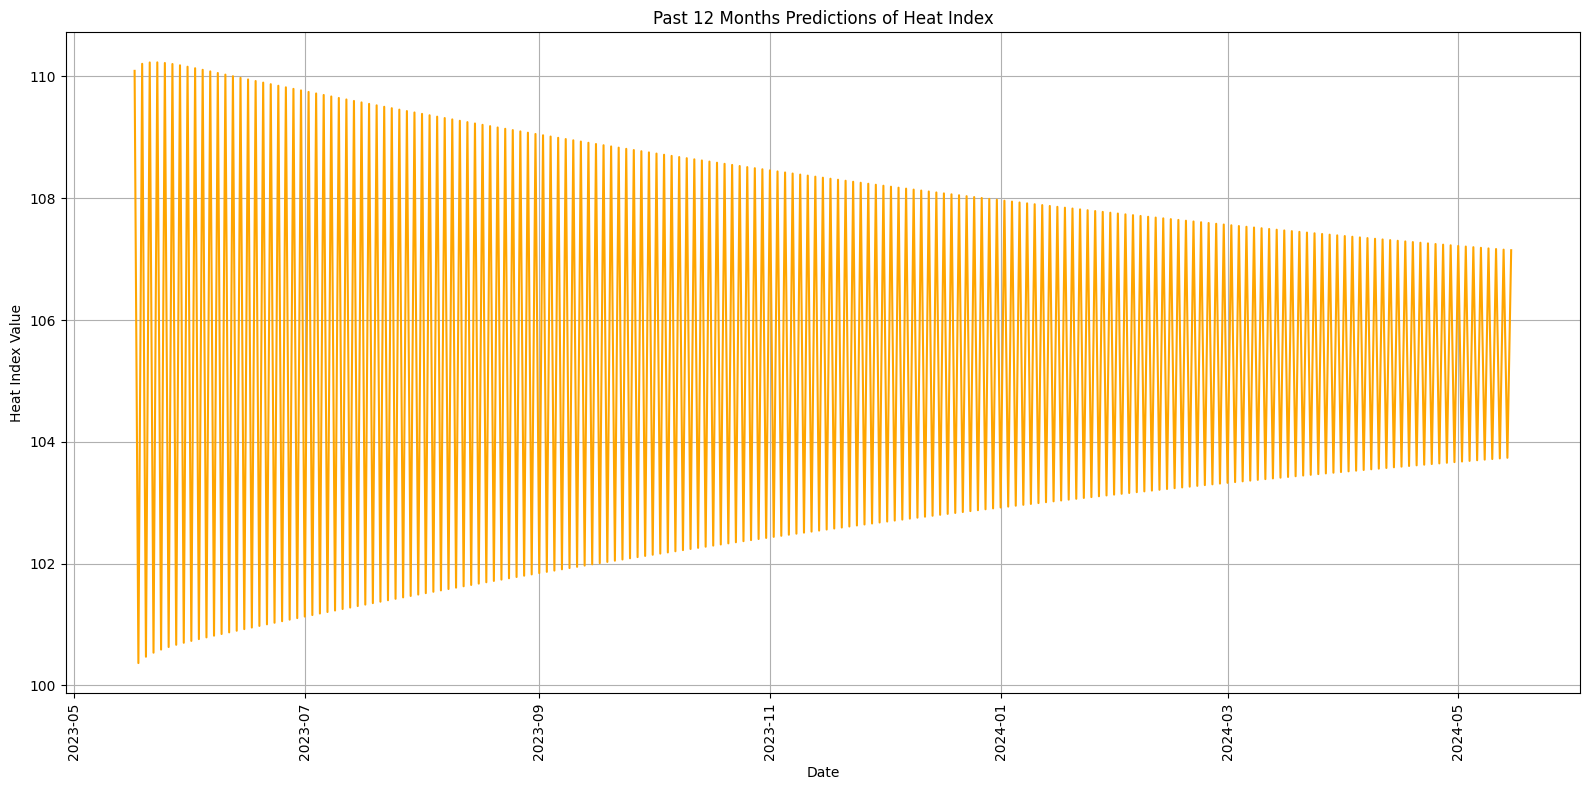

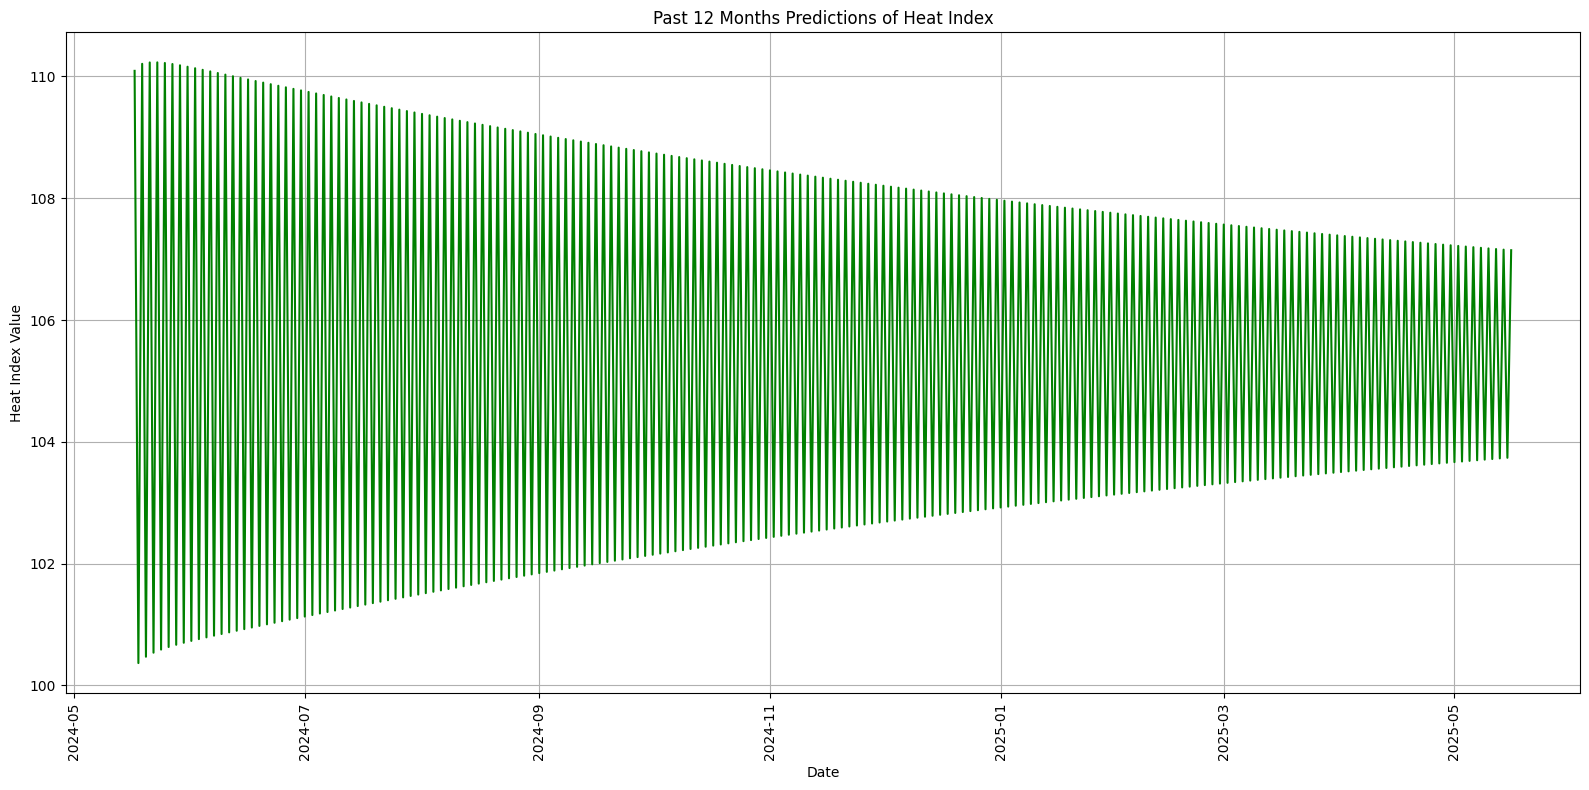

In [ ]:
# Convert 'date' column to datetime type
pastPrediction['date'] = pd.to_datetime(pastPrediction['date'])
futurePrediction['date'] = pd.to_datetime(futurePrediction['date'])

# Sort dataframe by date
pastPrediction = pastPrediction.sort_values(by='date')
futurePrediction = futurePrediction.sort_values(by='date')

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(pastPrediction['date'], pastPrediction['values'], color='orange')
plt.title('Past 12 Months Predictions of Heat Index')
plt.xlabel('Date')
plt.ylabel('Heat Index Value')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(futurePrediction['date'], futurePrediction['values'], color='green')
plt.title('Past 12 Months Predictions of Heat Index')
plt.xlabel('Date')
plt.ylabel('Heat Index Value')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

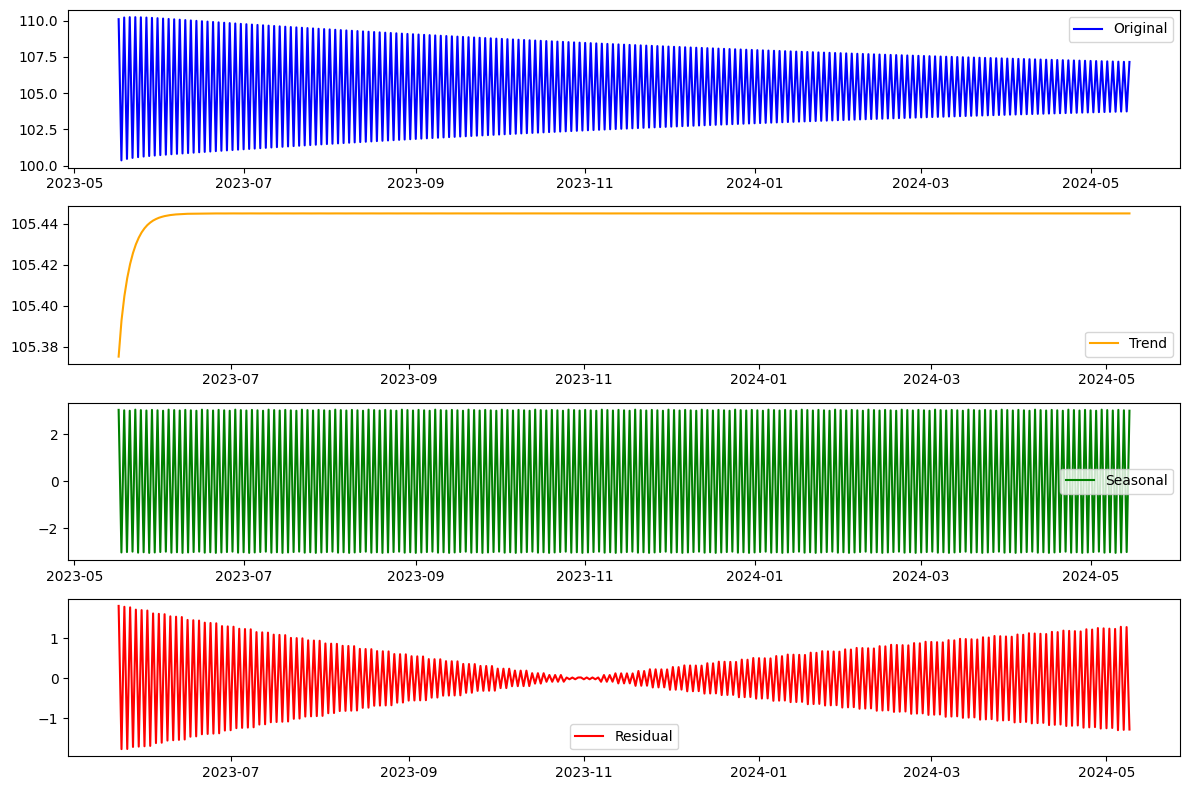

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you already have 'pastPrediction' DataFrame with 'date' and 'values' columns

# Convert 'date' column to datetime type if not already done
pastPrediction['date'] = pd.to_datetime(pastPrediction['date'])

# Set 'date' column as index
pastPrediction.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(pastPrediction['values'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(pastPrediction['values'], label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


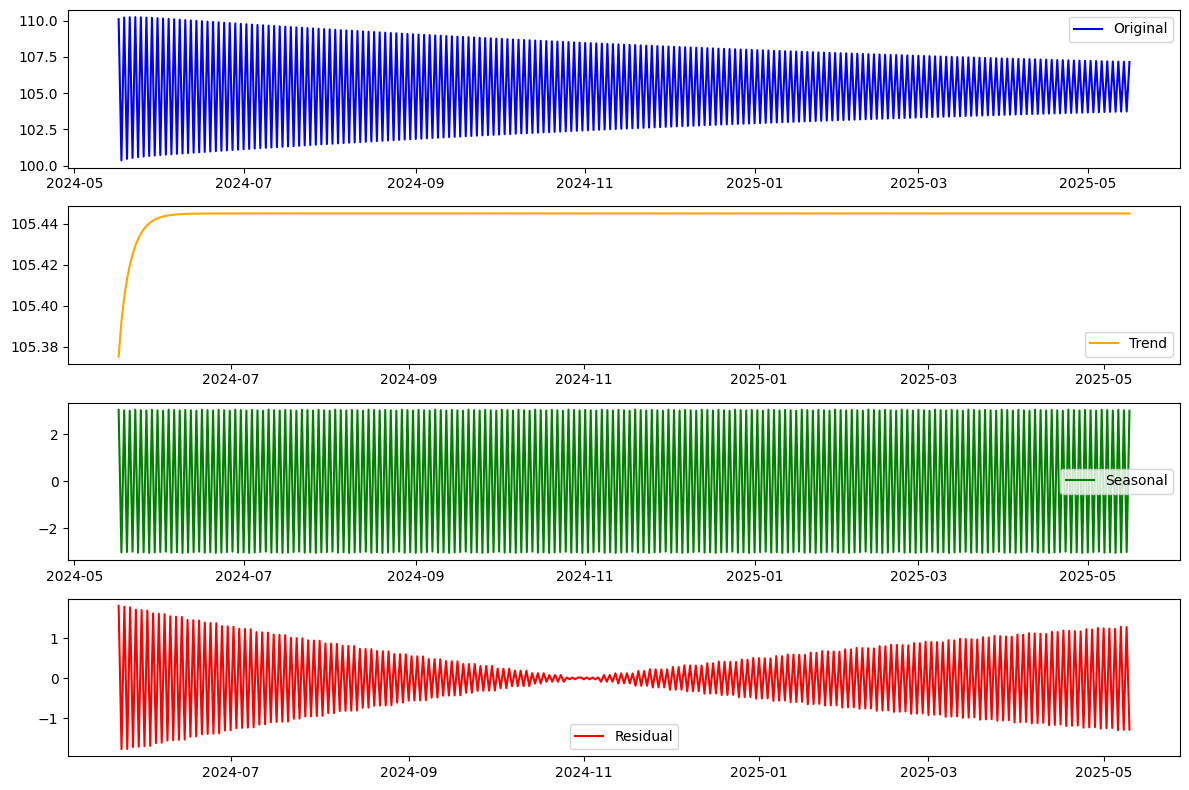

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you already have 'pastPrediction' DataFrame with 'date' and 'values' columns

# Convert 'date' column to datetime type if not already done
futurePrediction['date'] = pd.to_datetime(futurePrediction['date'])

# Set 'date' column as index
futurePrediction.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(futurePrediction['values'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(futurePrediction['values'], label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()